In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
filename = "tests/25-11-2021-05-12-49-tests.csv"
df = pd.read_csv(filename)

df_human = df[df["heuristic"] == "HUMAN"]
df_jwos = df[df["heuristic"] == "JWOS"]
df_first = df[df["heuristic"] == "FIRST"]
df_jwts = df[df["heuristic"] == "JWTS"]
df_dlcs = df[df["heuristic"] == "DLCS"]
df_random = df[df["heuristic"] == "RAND"]

heuristics = ["HUMAN", "JWOS", "JWTS", "DLCS", "FIRST", "RAND"]
damnhards = ["damnhard-" + str(i) for i in range(1,31)]
thousands = ["1000 sudokus-" + str(i) for i in range(1,31)]
df_damnhard = df.loc[df['puzzle ID'].isin(damnhards)]
df_thousands = df.loc[df['puzzle ID'].isin(thousands)]

sb.set(rc = {'figure.figsize':(15,8)})
sb.set(font_scale = 2)
sb.set_style("whitegrid")

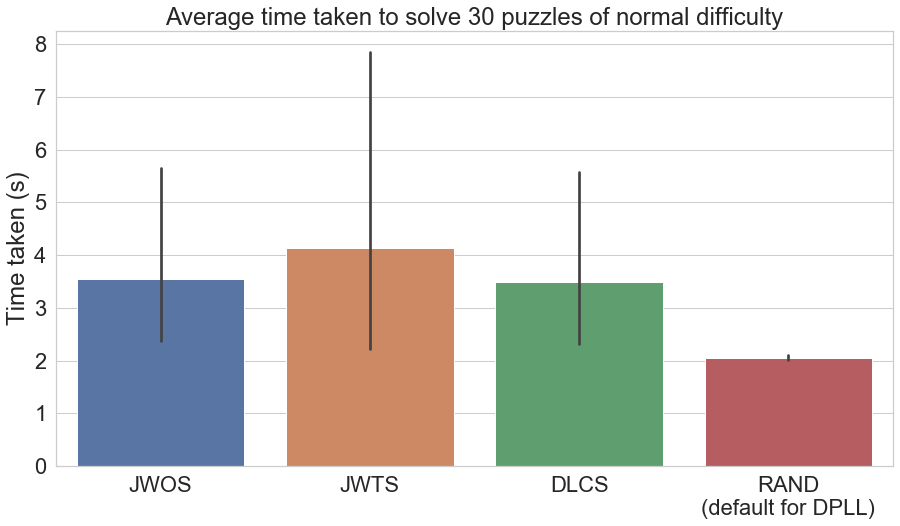

In [143]:
generic_heuristics = ["JWOS", "RAND", "JWTS", "DLCS"]
df_difficulties = df[["heuristic", "time taken", "puzzle type"]]
df_difficulties = df_difficulties[df_difficulties["puzzle type"] == "normal"]
df_difficulties = df_difficulties.loc[df_difficulties["heuristic"].isin(generic_heuristics)]
ax = sb.barplot(x="heuristic", y="time taken", data=df_difficulties)#, color='grey')
ax.set(xlabel='', ylabel='Time taken (s)')
ax.set_xticklabels(["JWOS", "JWTS", "DLCS", "RAND\n(default for DPLL)"])
#ax.set_yscale("log")
plt.title("Average time taken to solve 30 puzzles of normal difficulty")
plt.show()

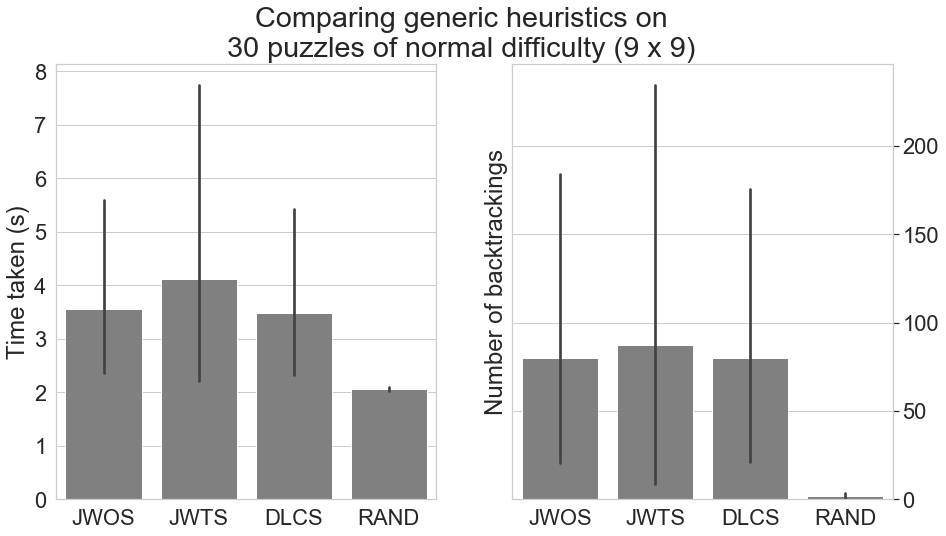

In [189]:
fig, axes = plt.subplots(1, 2)
fig.suptitle("Comparing generic heuristics on\n30 puzzles of normal difficulty (9 x 9)")

generic_heuristics = ["JWOS", "RAND", "JWTS", "DLCS"]
df_difficulties = df[["heuristic", "backtracking", "puzzle type"]]
df_difficulties = df_difficulties[df_difficulties["puzzle type"] == "normal"]
df_difficulties = df_difficulties.loc[df_difficulties["heuristic"].isin(generic_heuristics)]
sb.barplot(ax=axes[1], x="heuristic", y="backtracking", data=df_difficulties, color='grey')
axes[1].set(xlabel='', ylabel='Number of backtrackings')
axes[1].set_xticklabels(["JWOS", "JWTS", "DLCS", "RAND"])
axes[1].yaxis.tick_right()
#ax.set_yscale("log")
#plt.title("Average number of backtracking needed to solve 30 puzzles of normal difficulty (9 x 9)")

generic_heuristics = ["JWOS", "RAND", "JWTS", "DLCS"]
df_difficulties = df[["heuristic", "time taken", "puzzle type"]]
df_difficulties = df_difficulties[df_difficulties["puzzle type"] == "normal"]
df_difficulties = df_difficulties.loc[df_difficulties["heuristic"].isin(generic_heuristics)]
sb.barplot(ax=axes[0], x="heuristic", y="time taken", data=df_difficulties, color='grey')
axes[0].set(xlabel='', ylabel='Time taken (s)')
axes[0].set_xticklabels(["JWOS", "JWTS", "DLCS", "RAND"])
#ax.set_yscale("log")
#plt.title("Comparing generic heuristics on 30 puzzles of normal difficulty")
plt.show()

In [96]:
#df_human[["time taken", "backtracking"]].describe()
#df_jwos[["time taken", "backtracking"]].describe()
#df_first[["time taken", "backtracking"]].describe()
#df_jwts[["time taken", "backtracking"]].describe()
#df_random[["time taken", "backtracking"]].describe()
#df_random[df_random["puzzle type"] == "hard"][["time taken", "backtracking"]].describe()
df_dlcs[df_dlcs["puzzle type"] == "hard"][["time taken", "branches", "backtracking"]].describe()

,time taken,branches,backtracking
count,30.000000,30.000000,30.000000
mean,485.898303,19764.266667,19733.633333
std,661.001967,26553.146844,26548.968411
min,1.968466,0.000000,0.000000
25%,19.277237,818.750000,773.000000
50%,258.069954,11091.500000,11060.500000
75%,688.609242,29408.750000,29376.500000
max,2770.872956,108586.000000,108529.000000


In [10]:
df_1000s_1_human = df_1000s_1[df_1000s_1["heuristic"] == "HUMAN"]
df_1000s_1_human.head()

,Unnamed: 0,heuristic,puzzle ID,time taken,backtracking,branches,clues,puzzle,solution
0,0,HUMAN,1000 sudokus-1,2.219526,0,0,21,"[['249'], ['254'], ['262'], ['288'], ['311'], ...","['139', '813', '983', '956', '977', '432', '75..."


In [31]:
df.columns

Index(['Unnamed: 0', 'heuristic', 'puzzle ID', 'puzzle type', 'time taken',
       'backtracking', 'branches', 'clues', 'puzzle', 'solution'],
      dtype='object')

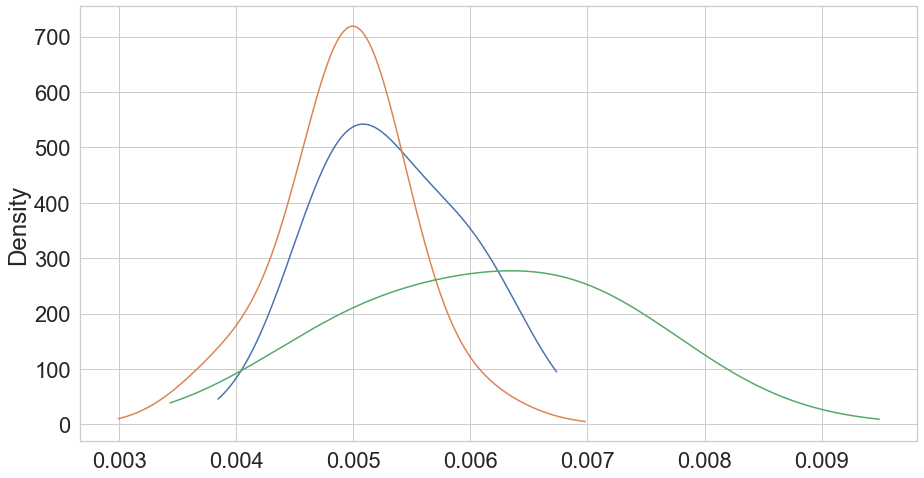

In [104]:

df_random_hard = df_random[df_random["puzzle type"] == ptype]
df_dlcs_hard = df_dlcs[df_dlcs["puzzle type"] == ptype]
df_human_hard = df_human[df_human["puzzle type"] == ptype]
df_first_hard = df_first[df_first["puzzle type"] == ptype]
ax = df_random_hard["time taken"].plot.kde(bw_method=bw)
#ax = df_dlcs_hard["time taken"].plot.kde(bw_method=bw)
ax = df_human_hard["time taken"].plot.kde(bw_method=bw)
ax = df_first_hard["time taken"].plot.kde(bw_method=bw)

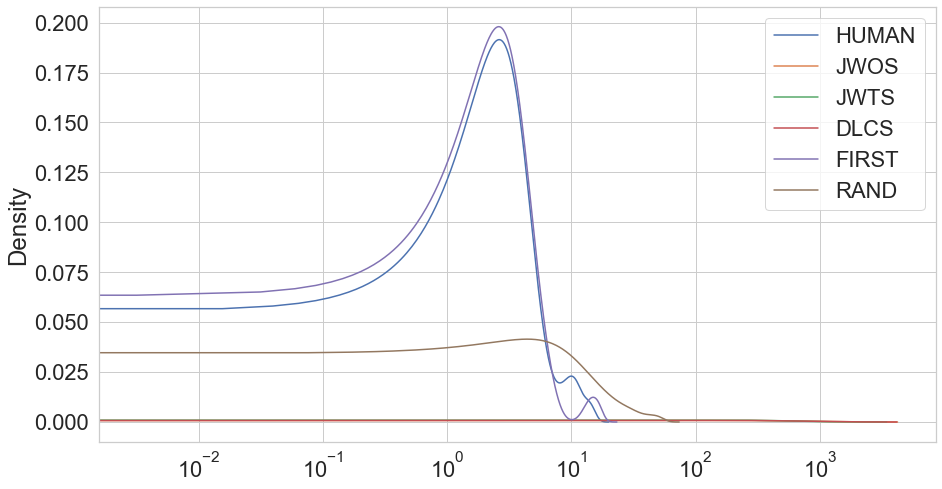

In [121]:
ptype = "hard"
bw = 0.5
for heuristic in heuristics:
    df_h = df[df["heuristic"] == heuristic]
    ax = df_h[df_h["puzzle type"] == ptype]["time taken"].plot.kde(bw_method=bw, label=heuristic)
    ax.set_xscale('log')
    ax.legend()

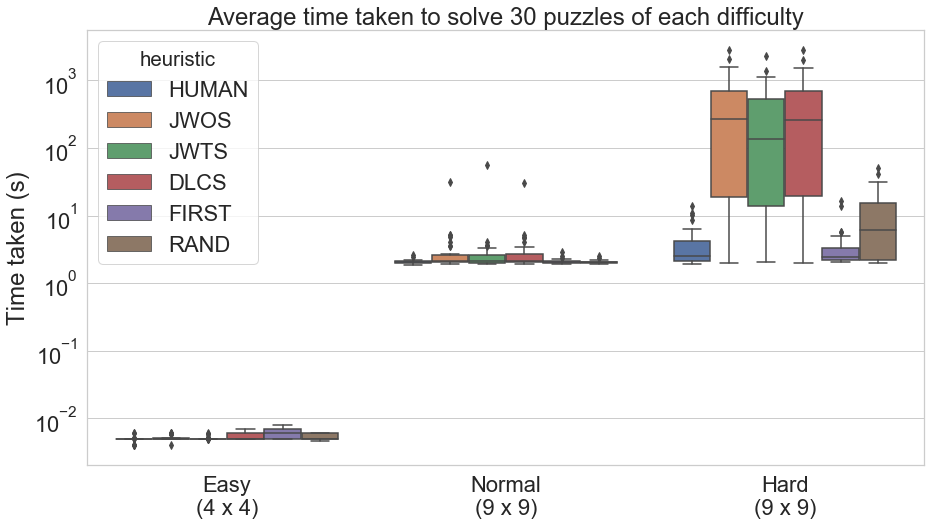

In [122]:
df_difficulties = df[["heuristic", "time taken", "puzzle type"]]
ax = sb.boxplot(x="puzzle type", y="time taken", hue="heuristic", data=df_difficulties)#, color='grey')
ax.set(xlabel='', ylabel='Time taken (s)')
ax.set_xticklabels(["Easy\n(4 x 4)", "Normal\n(9 x 9)", "Hard\n(9 x 9)"])
ax.set_yscale("log")
plt.title("Average time taken to solve 30 puzzles of each difficulty")
plt.show()

In [128]:
ptype = "easy"
bw = 0.5
for heuristic in heuristics:
    df_h = df[df["heuristic"] == heuristic]
    ax = df_h[df_h["puzzle type"] == ptype]["time taken"].plot.box()
    #ax.set_xscale('log')
    ax.legend()

AttributeError: 'Series' object has no attribute 'boxplot'

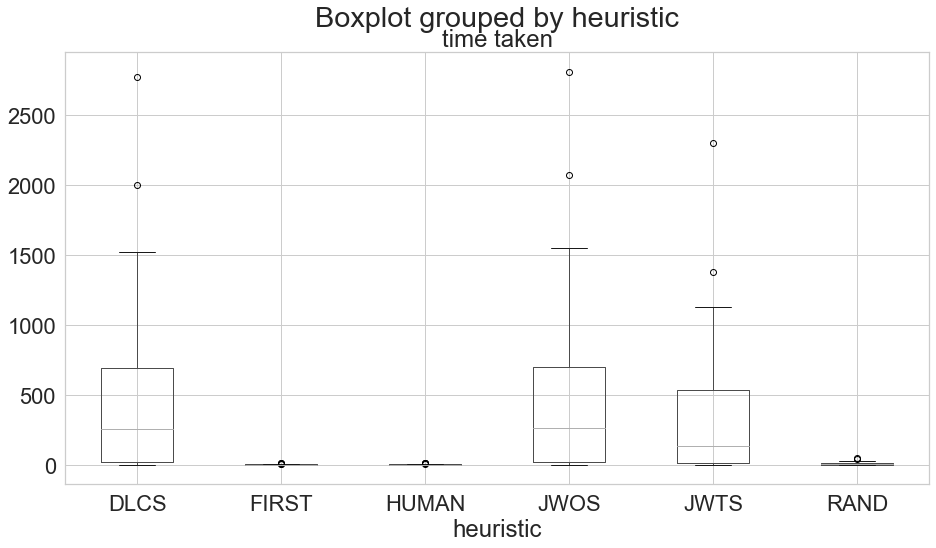

In [136]:
df[df["puzzle type"] == "hard"].boxplot(column=["time taken"], by='heuristic')
# ptype = "easy"
# bw = 0.5
# for heuristic in heuristics:
#     df_h = df[df["heuristic"] == heuristic]
#     ax = df_h[df_h["puzzle type"] == ptype]["time taken"].plot.box(column=['Col1', 'Col2', 'Col3'])
#     #ax.set_xscale('log')
#     ax.legend()

In [158]:
#df.head()
df_times = df[["heuristic", "puzzle ID", "time taken"]]
df_times.groupby("heuristic").max()

,puzzle ID,time taken
heuristic,,
DLCS,damnhard-9,2770.872956
FIRST,damnhard-9,16.155418
HUMAN,damnhard-9,13.920826
JWOS,damnhard-9,2805.803025
JWTS,damnhard-9,2297.375731
RAND,damnhard-9,49.706562


In [170]:
df_times["time taken"].idxmax()

408

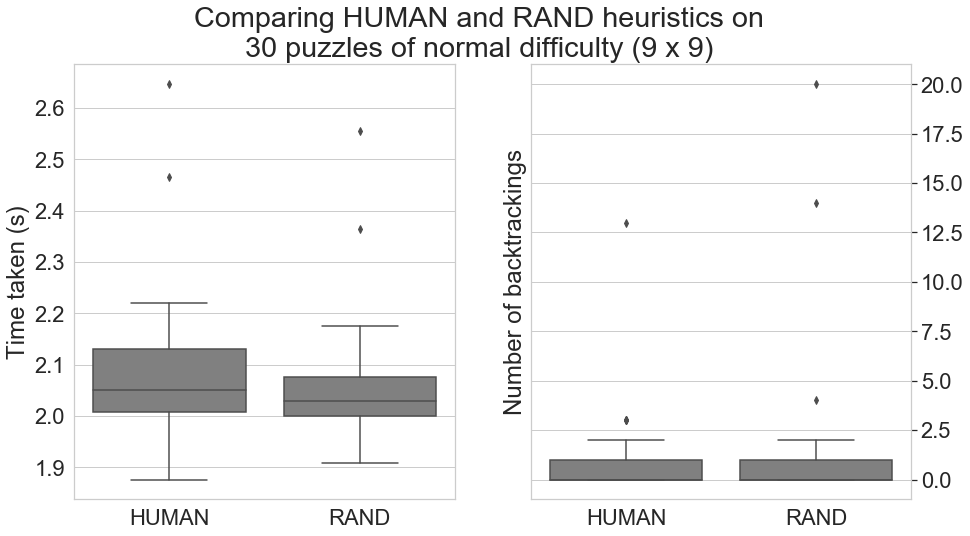

In [205]:
### Comparing human and rand on normal puzzles
ptype = "normal"
fig, axes = plt.subplots(1, 2)
fig.suptitle("Comparing HUMAN and RAND heuristics on\n30 puzzles of {} difficulty (9 x 9)".format(ptype))

generic_heuristics = ["HUMAN", "RAND"]
df_difficulties = df[["heuristic", "backtracking", "puzzle type", "time taken"]]
df_difficulties = df_difficulties[df_difficulties["puzzle type"] == ptype]
df_difficulties = df_difficulties.loc[df_difficulties["heuristic"].isin(generic_heuristics)]

sb.boxplot(ax=axes[1], x="heuristic", y="backtracking", data=df_difficulties, color='grey')
axes[1].set(xlabel='', ylabel='Number of backtrackings')
axes[1].set_xticklabels(generic_heuristics)
axes[1].yaxis.tick_right()

sb.boxplot(ax=axes[0], x="heuristic", y="time taken", data=df_difficulties, color='grey')
axes[0].set(xlabel='', ylabel='Time taken (s)')
axes[0].set_xticklabels(generic_heuristics)
plt.show()

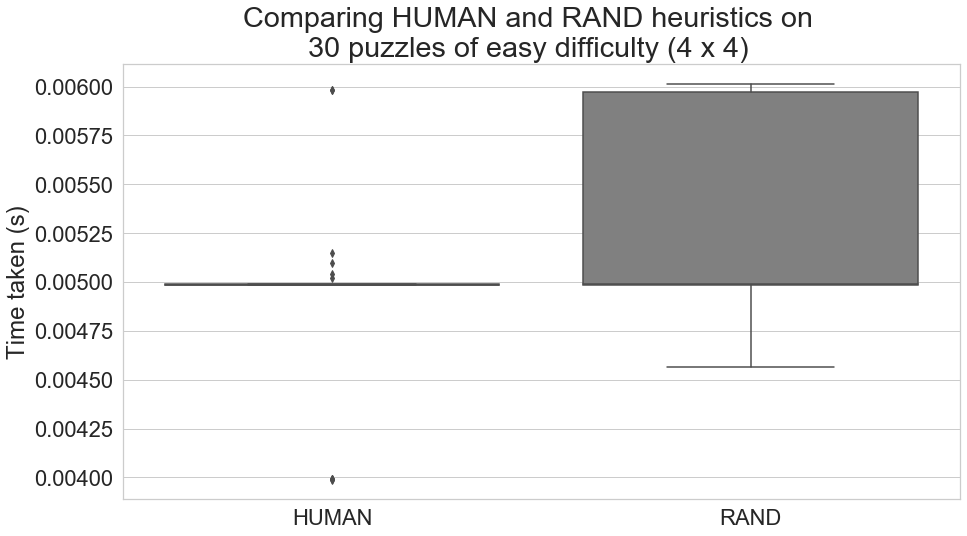

In [204]:
### Comparing human and rand on normal puzzles
ptype = "easy"
fig, axes =  plt.subplots()
fig.suptitle("Comparing HUMAN and RAND heuristics on\n30 puzzles of {} difficulty (4 x 4)".format(ptype))

generic_heuristics = ["HUMAN", "RAND"]
df_difficulties = df[["heuristic", "backtracking", "puzzle type", "time taken"]]
df_difficulties = df_difficulties[df_difficulties["puzzle type"] == ptype]
df_difficulties = df_difficulties.loc[df_difficulties["heuristic"].isin(generic_heuristics)]

sb.boxplot(ax=axes, x="heuristic", y="time taken", data=df_difficulties, color='grey')
axes.set(xlabel='', ylabel='Time taken (s)')
axes.set_xticklabels(generic_heuristics)
plt.show()

In [243]:
from scipy.stats import f_oneway, ttest_ind, levene
ptype = "hard"
#measured_value = "time taken"
measured_value = "backtracking"
df_jwos_2 = df_jwos[df_jwos["puzzle type"] == ptype]
df_jwts_2 = df_jwts[df_jwts["puzzle type"] == ptype]
df_dlcs_2 = df_dlcs[df_dlcs["puzzle type"] == ptype]
df_random_2 = df_random[df_random["puzzle type"] == ptype]
df_human_2 = df_human[df_human["puzzle type"] == ptype]
f_oneway(df_jwos_2[measured_value], df_jwts_2[measured_value], df_dlcs_2[measured_value], df_random_2[measured_value])

F_onewayResult(statistic=5.690680837317024, pvalue=0.0011369467344704983)

In [244]:
ttest_ind(df_random_2[measured_value], df_human_2[measured_value])

Ttest_indResult(statistic=2.8676765986202177, pvalue=0.0057560139508040144)

In [232]:
levene(df_jwos_2["backtracking"], df_jwts_2["backtracking"], df_dlcs_2["backtracking"], df_random_2["backtracking"])

LeveneResult(statistic=0.7015780291778972, pvalue=0.5529628982713835)

In [223]:
df_jwos_2["clues"].mean()

22.3

df_jwos_2["clues"].std()

In [224]:
df_jwos_2["clues"].std()

0.5349830806219241

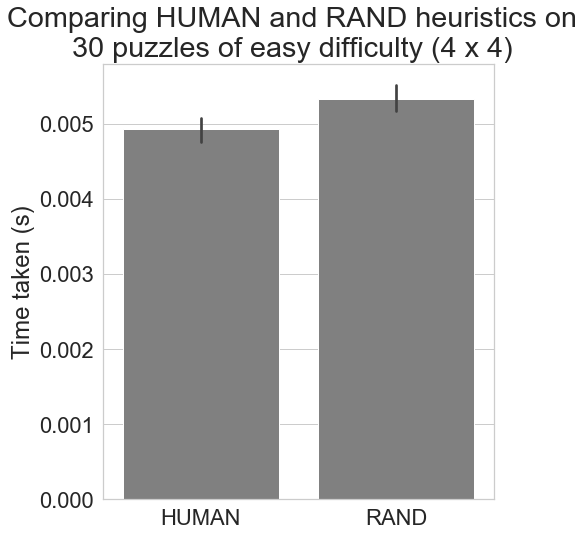

In [248]:
### Comparing human and rand on normal puzzles
sb.set(rc = {'figure.figsize':(7,8)})
sb.set(font_scale = 2)
sb.set_style("whitegrid")
ptype = "easy"
fig, axes =  plt.subplots()
fig.suptitle("Comparing HUMAN and RAND heuristics on\n30 puzzles of {} difficulty (4 x 4)".format(ptype))

generic_heuristics = ["HUMAN", "RAND"]
df_difficulties = df[["heuristic", "backtracking", "puzzle type", "time taken"]]
df_difficulties = df_difficulties[df_difficulties["puzzle type"] == ptype]
df_difficulties = df_difficulties.loc[df_difficulties["heuristic"].isin(generic_heuristics)]

sb.barplot(ax=axes, x="heuristic", y="time taken", data=df_difficulties, color='grey')
axes.set(xlabel='', ylabel='Time taken (s)')
axes.set_xticklabels(generic_heuristics)
plt.show()